<a href="https://colab.research.google.com/github/onurceyhan/hu-bby261-2021-proje4/blob/main/KilometreMilTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch sayısını giriniz:10
Bağıntılar çalıştırılıyor...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


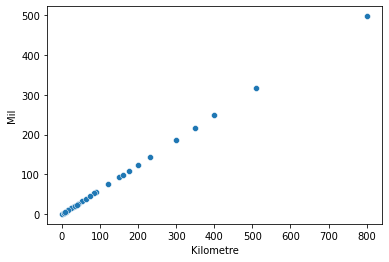

Giriş(X) ve çıkış(Y) değişkenlerini tanımla
Model yaratılıyor...
Model derleniyor...
Model eğitiliyor...
Epoch 1/10
1/1 [==============================] - 1s 898ms/step - loss: 1542.6340
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 36944.5156
Epoch 3/10
1/1 [==============================] - 0s 12ms/step - loss: 2967.5911
Epoch 4/10
1/1 [==============================] - 0s 29ms/step - loss: 7690.0752
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 19986.9824
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 12467.2793
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 1663.4835
Epoch 8/10
1/1 [==============================] - 0s 15ms/step - loss: 1374.8920
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 8190.5625
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 10421.7354
Model değerlendiriliyor...
dict_keys(['loss'])


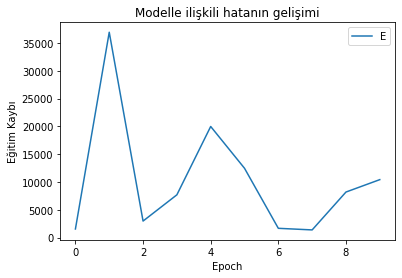

Km'yi giriniz: 1
Kilometreden Mile çevirme aşağıdaki gibidir: [[1.4363145]]
Matematiksel formül kullanılarak kilometreden mile dönüşüm aşağıdaki gibidir.:0.6214
Tahmin Hatası:[[-0.81491446]]


In [9]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mildosya  = pd.read_csv('/Kilometre-mil.csv')
mildosya.info

epochgiris = int(input("Epoch sayısını giriniz:"))

print("Bağıntılar çalıştırılıyor...")
sns.scatterplot(df['Kilometre'], df['Mil'])
plt.show()

print("Giriş(X) ve çıkış(Y) değişkenlerini tanımla")
X_train = mildosya['Kilometre']
y_train = mildosya['Mil']

print("Model yaratılıyor...")
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

print("Model derleniyor...")
model.compile(optimizer=tf.keras.optimizers.Adam(1), loss='mean_squared_error')

print ("Model eğitiliyor...")
epochs_hist = model.fit(X_train, y_train, epochs = epochgiris)

print("Model değerlendiriliyor...")
print(epochs_hist.history.keys())

#graph
plt.plot(epochs_hist.history['loss'])
plt.title('Modelle ilişkili hatanın gelişimi')
plt.xlabel('Epoch')
plt.ylabel('Eğitim Kaybı')
plt.legend('Eğitim Kaybı')
plt.show()


kilometre = int(input("Km'yi giriniz: "))
TahminEdilenMil = model.predict([kilometre])
print("Kilometreden Mile çevirme aşağıdaki gibidir: " + str(TahminEdilenMil))

MatematikselMil = kilometre * 0.6214
print("Matematiksel formül kullanılarak kilometreden mile dönüşüm aşağıdaki gibidir.:" + str(MatematikselMil))
fark = MatematikselMil - TahminEdilenMil
print("Tahmin Hatası:" + str(fark))